# TEMPLATE


**Source**

- [Yahoo finance](https://finance.yahoo.com/quote/%5EVIX/history?period1=475804800&period2=1601251200&interval=1d&filter=history&frequency=1d)

## Set Up

In [1]:
dataset_file_name = "united-states.gross-domestic-product-qq.csv"
date_original_format = "yyyy.mm.dd"
column_to_keep = 2 # Column number in the original file e.g. High or ActualValue
predict_days = 30 # number of days to predict

verbose = true
verbose = false

path_data_original  = "../Data/original/"
path_data_processed = "../Data/processed/"
include("../Julia/functions.jl") 
println()

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Set-Up" data-toc-modified-id="Set-Up-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Set Up</a></span></li><li><span><a href="#Read-Data" data-toc-modified-id="Read-Data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Read Data</a></span><ul class="toc-item"><li><span><a href="#Sample-the-data" data-toc-modified-id="Sample-the-data-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Sample the data</a></span></li></ul></li><li><span><a href="#Extract-right-columns-and-sort" data-toc-modified-id="Extract-right-columns-and-sort-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Extract right columns and sort</a></span></li><li><span><a href="#Insert-Rata-Die-Column" data-toc-modified-id="Insert-Rata-Die-Column-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Insert Rata Die Column</a></span><ul class="toc-item"><li><span><a href="#Insert-Future-Date" data-toc-modified-id="Insert-Future-Date-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Insert Future Date</a></span></li><li><span><a href="#Update-the-Rata-Die-Column" data-toc-modified-id="Update-the-Rata-Die-Column-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Update the Rata Die Column</a></span></li><li><span><a href="#Fill-in-Empty-Dates-and-Sort" data-toc-modified-id="Fill-in-Empty-Dates-and-Sort-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Fill in Empty Dates and Sort</a></span></li><li><span><a href="#Fill:-Draw-Plots" data-toc-modified-id="Fill:-Draw-Plots-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Fill: Draw Plots</a></span></li></ul></li><li><span><a href="#Quantize-the-values" data-toc-modified-id="Quantize-the-values-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Quantize the values</a></span></li><li><span><a href="#Averages" data-toc-modified-id="Averages-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Averages</a></span><ul class="toc-item"><li><span><a href="#Averages:-Draw-Plots" data-toc-modified-id="Averages:-Draw-Plots-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Averages: Draw Plots</a></span></li><li><span><a href="#Insert-averages-to-DataFrame" data-toc-modified-id="Insert-averages-to-DataFrame-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Insert averages to DataFrame</a></span></li></ul></li><li><span><a href="#Save-DataFrame-to-CSV-file" data-toc-modified-id="Save-DataFrame-to-CSV-file-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Save DataFrame to CSV file</a></span><ul class="toc-item"><li><span><a href="#Save:-Describe-before-saving" data-toc-modified-id="Save:-Describe-before-saving-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Save: Describe before saving</a></span></li><li><span><a href="#Write-as-CSV-file" data-toc-modified-id="Write-as-CSV-file-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>Write as CSV file</a></span></li></ul></li></ul></div>

## Read Data

In [2]:
## show available datasets
#data = available_datasets() # uncomment to see all available datasets

# Read DataFrame from the CSV file.
df = fetch_dataset(dataset_file_name, date_original_format , path_data_original )

if verbose
    preview_data(df)
end

println()

Fetched ../Data/original/united-states.gross-domestic-product-qq.csv, record count 165
Showing record IDs [1, 29, 57, 85, 113, 141, 165] at interval 28
7×4 DataFrame
│ Row │ Date       │ ActualValue │ ForecastValue │ PreviousValue │
│     │ Date       │ Float64     │ Float64?      │ Float64?      │
├─────┼────────────┼─────────────┼───────────────┼───────────────┤
│ 1   │ 2020-11-25 │ 33.1        │ 33.1          │ 33.1          │
│ 2   │ 2018-06-28 │ 2.0         │ 2.1           │ 2.2           │
│ 3   │ 2016-02-26 │ 1.0         │ missing       │ 0.7           │
│ 4   │ 2013-11-07 │ 2.8         │ missing       │ 2.5           │
│ 5   │ 2011-06-24 │ 0.4         │ missing       │ 1.8           │
│ 6   │ 2009-02-27 │ -6.2        │ missing       │ -3.8          │
│ 7   │ 2007-02-28 │ 2.2         │ missing       │ missing       │
 Dataset dimentions: (165, 4)

 Column names (note any extra spaces):
1 'Date' 
2 'ActualValue' 
3 'ForecastValue' 
4 'PreviousValue' 



### Sample the data

In [3]:
if verbose
    using Statistics
    describe(df)
end

,variable,mean,min,median,max,nunique,nmissing,eltype
,Symbol,Union…,Any,Union…,Any,Union…,Union…,Type
1,Date,,2007-02-28,,2020-11-25,165,,Date
2,ActualValue,1.52667,-32.9,2.1,33.1,,,Float64
3,ForecastValue,0.0595238,-37.9,2.1,33.1,,123,"Union{Missing, Float64}"
4,PreviousValue,1.34512,-32.9,2.1,33.1,,1,"Union{Missing, Float64}"


## Extract right columns and sort

In [4]:
include("../Julia/function_toFloat64.jl")

using DataFrames
df = DataFrame( 
                  Date      = df[:,1]               # 2 
                , Original  = toFloat64( df[:,column_to_keep] )  # 3 
                , Quantized = toFloat64( df[:,column_to_keep] )  # 4 
               )

df = sort(df, [ :Date ]);

if verbose
    columns = preview_data(df)
end
println()

Showing record IDs [1, 29, 57, 85, 113, 141, 165] at interval 28
7×3 DataFrame
│ Row │ Date       │ Original │ Quantized │
│     │ Date       │ Float64  │ Float64   │
├─────┼────────────┼──────────┼───────────┤
│ 1   │ 2007-02-28 │ 2.2      │ 2.2       │
│ 2   │ 2009-06-25 │ -6.4     │ -6.4      │
│ 3   │ 2011-10-27 │ 2.5      │ 2.5       │
│ 4   │ 2014-02-28 │ 2.4      │ 2.4       │
│ 5   │ 2016-06-28 │ 1.1      │ 1.1       │
│ 6   │ 2018-10-26 │ 3.5      │ 3.5       │
│ 7   │ 2020-11-25 │ 33.1     │ 33.1      │
 Dataset dimentions: (165, 3)

 Column names (note any extra spaces):
1 'Date' 
2 'Original' 
3 'Quantized' 



## Insert Rata Die Column

In [5]:
## Insert the Rata Die Column
record_count = size(df)[1]
insert_localtion = 1
insertcols!(df, insert_localtion, :Rata_Die => zeros(Int64, record_count); makeunique = true )
println()

### Insert Future Date

In [6]:
using Dates
columns = names(df)
if verbose
    println(columns)
end

future_rata_die = Dates.datetime2rata( today() ) + predict_days # Int64  days from now
future_date = Dates.rata2datetime( future_rata_die) # Date
println(future_date)
push!(df, [ future_rata_die future_date 0.0 0.0 ])

## sort by Day (Rata Die)
df = sort(df, [:Rata_Die]);
if verbose
    ## show last row
    last_row = size(df)[1]
    df[last_row,:]
end

["Rata_Die", "Date", "Original", "Quantized"]
2021-01-05T00:00:00


,Rata_Die,Date,Original,Quantized
,Int64,Date,Float64,Float64
166,737795,2021-01-05,0.0,0.0


### Update the Rata Die Column

In [7]:
update_rata_die!(df, 1, 2)

if verbose
    first(df, 6)
    println("Inserted Rata Die")
end

Inserted Rata Die


### Fill in Empty Dates and Sort

In [8]:
populate_missing_dates!(df)

df = sort(df, [:Rata_Die]);

## remove last row
record_count = size(df)[1]
df = df[1:record_count-1,:]

if verbose
    println( preview_data(df) )
    println()
end

Showing record IDs [1, 844, 1687, 2530, 3373, 4216, 5059, 5060] at interval 843
8×4 DataFrame
│ Row │ Rata_Die │ Date       │ Original │ Quantized │
│     │ Int64    │ Date       │ Float64  │ Float64   │
├─────┼──────────┼────────────┼──────────┼───────────┤
│ 1   │ 732735   │ 2007-02-28 │ 2.2      │ 2.2       │
│ 2   │ 733578   │ 2009-06-20 │ -5.7     │ -5.7      │
│ 3   │ 734421   │ 2011-10-11 │ 1.3      │ 1.3       │
│ 4   │ 735264   │ 2014-01-31 │ 3.2      │ 3.2       │
│ 5   │ 736107   │ 2016-05-23 │ 0.5      │ 0.5       │
│ 6   │ 736950   │ 2018-09-13 │ 4.2      │ 4.2       │
│ 7   │ 737793   │ 2021-01-03 │ 33.1     │ 33.1      │
│ 8   │ 737794   │ 2021-01-04 │ 33.1     │ 33.1      │
 Dataset dimentions: (5060, 4)

 Column names (note any extra spaces):
1 'Rata_Die' 
2 'Date' 
3 'Original' 
4 'Quantized' 
["Rata_Die", "Date", "Original", "Quantized"]



### Fill: Draw Plots
- if the indicator is updated only preiodically (bi-weekly, monthly, quarterly) the the graph will appear blocky

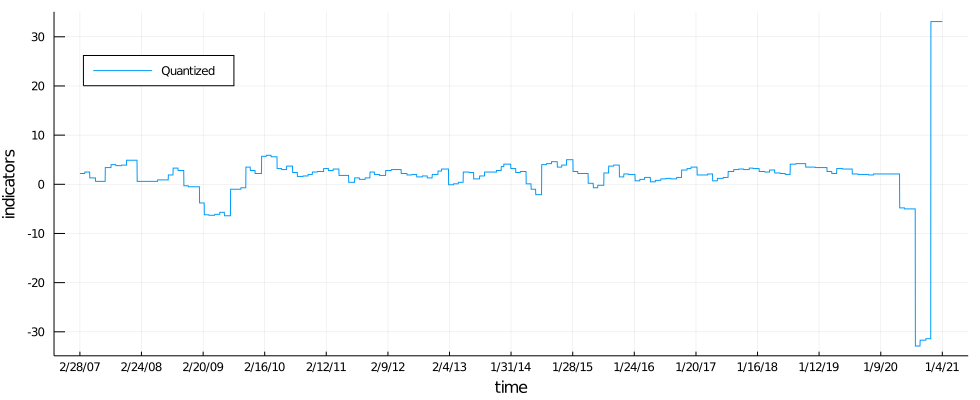

In [9]:
if verbose
    using Plots
    count = size(df)[1]
    rows = 1:count
    dates = format_dates( df[rows,2] , "m/d/yy")

    gr()
    plot(          dates, # x-axis: dates
                   [ df[rows,:Quantized]    ], # y-axis
        label    = [ "Quantized"  ""],
        legend   =:topleft, 
                  # :right, :left, :top, :bottom, :inside, :best, :legend, :topright, :topleft, :bottomleft, :bottomright
        xlabel   = "time",
        ylabel   = "indicators",
        size     = (980, 400), # width, height
        layout = (1, 1) # number of graphs: vertically, horizontally
        )
end

## Quantize the values

- Quantization is a process of noramalizing the data
- I have decided to normalize the data for Int8 as I might try use Google Coral NPU
- minimum = -128.0
- maximum = 127.0

In [10]:
data_original = df[:,3] # keep original for display comparison later

quantize_column!(df,4)

if verbose
    using Statistics
    describe(df)
end

,variable,mean,min,median,max,nunique,nmissing,eltype
,Symbol,Union…,Any,Union…,Any,Union…,Nothing,DataType
1,Rata_Die,7.35264e5,732735,7.35264e5,737794,,,Int64
2,Date,,2007-02-28,,2021-01-04,5060,,Date
3,Original,1.58779,-32.9,2.1,33.1,,,Float64
4,Quantized,5.2334,-128.0,7.0,127.0,,,Float64


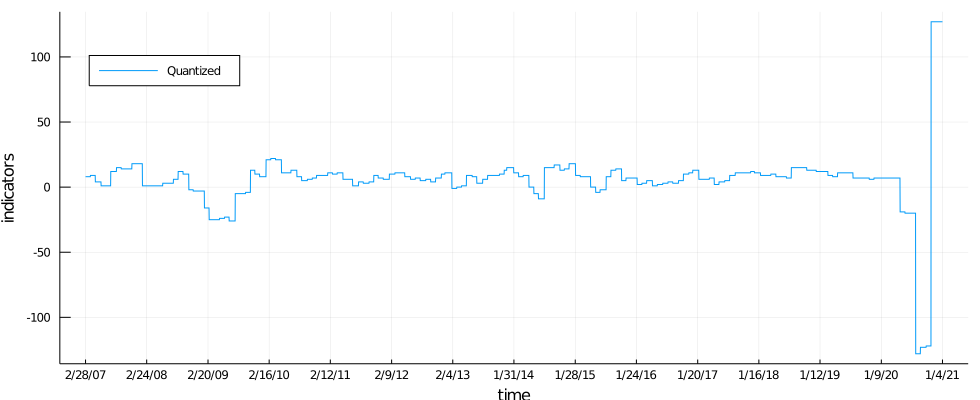

In [11]:
if verbose
    using Plots

    count = size(df)[1]
    rows = 1:count
    dates = format_dates( df[rows,2] , "m/d/yy")

    gr()
    plot(          dates, # x-axis: dates
                   [  df[rows,:Quantized]    ], # y-axis
        label    = [  "Quantized" ""   ]  ,
        legend   =:topleft, 
                  # :right, :left, :top, :bottom, :inside, :best, :legend, :topright, :topleft, :bottomleft, :bottomright
        xlabel   = "time",
        ylabel   = "indicators",
        size     = (980, 400), # width, height
        layout = (1, 1) # number of graphs: vertically, horizontally
        )
end

## Averages

In [12]:
averages005 = calculate_average(df, 5,   :Quantized )
averages030 = calculate_average(df, 30,  :Quantized )
averages060 = calculate_average(df, 60,  :Quantized )
averages090 = calculate_average(df, 90,  :Quantized )
averages120 = calculate_average(df, 120, :Quantized )
averages180 = calculate_average(df, 180, :Quantized )
println()

### Averages: Draw Plots

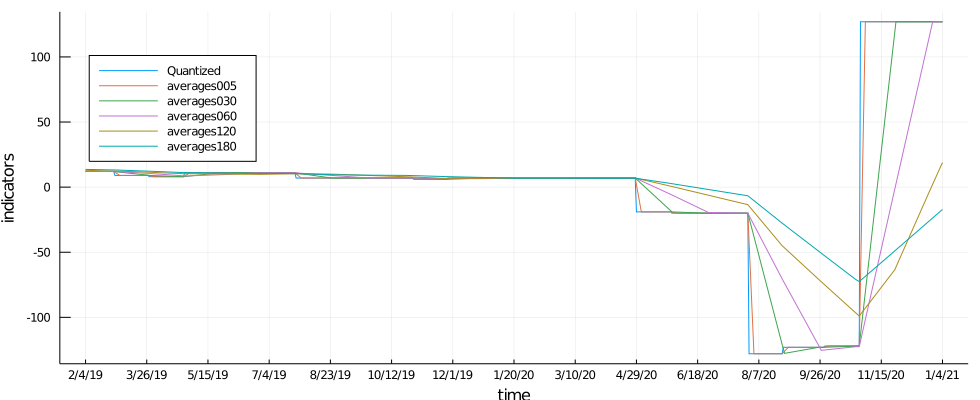

In [13]:
if verbose
    using Plots

    columns = names(df)
    record_count = size(df)[1]
    days_back = 700
    rows = record_count-days_back:record_count # count-days_back:count
    dates = format_dates( df[rows,2] , "m/d/yy")

    gr()
    plot( dates, # x-axis: dates
        [ 
            df[rows,:Quantized] averages005[rows] averages030[rows] averages060[rows] averages120[rows] averages180[rows]  
        ], # y-axis
        label    = [ "Quantized" "averages005" "averages030" "averages060" "averages120" "averages180"   ""],
        legend   =:topleft, 
                  # :right, :left, :top, :bottom, :inside, :best, :legend, :topright, :topleft, :bottomleft, :bottomright
        xlabel   = "time",
        ylabel   = "indicators",
        size     = (980, 400), # width, height
        layout = (1, 1) # number of graphs: vertically, horizontally
        )
end

### Insert averages to DataFrame

- if the frequency of data is e.g. 30 days, averages below 30 days do not add value

In [14]:
insertcols!(df,  5,  :Avg005   => averages005  , makeunique=true)
insertcols!(df,  6,  :Avg030   => averages030  , makeunique=true)
insertcols!(df,  7,  :Avg060   => averages060  , makeunique=true)
insertcols!(df,  8,  :Avg090   => averages090  , makeunique=true)
insertcols!(df,  9,  :Avg120   => averages120  , makeunique=true)
insertcols!(df, 10,  :Avg180   => averages180  , makeunique=true)

if verbose
    using Statistics
    describe(df)
end

,variable,mean,min,median,max,nunique,nmissing,eltype
,Symbol,Union…,Any,Union…,Any,Union…,Nothing,DataType
1,Rata_Die,7.35264e5,732735,7.35264e5,737794,,,Int64
2,Date,,2007-02-28,,2021-01-04,5060,,Date
3,Original,1.58779,-32.9,2.1,33.1,,,Float64
4,Quantized,5.2334,-128.0,7.0,127.0,,,Float64
5,Avg005,5.18004,-128.0,7.0,127.0,,,Float64
6,Avg030,4.84652,-127.67,7.03,127.0,,,Float64
7,Avg060,4.44493,-125.33,7.0,127.0,,,Float64
8,Avg090,4.17377,-124.24,7.0,66.13,,,Float64
9,Avg120,4.20085,-99.03,6.88,18.91,,,Float64


[back to top](#Table-of-Contents)
<hr/>

## Save DataFrame to CSV file

### Save: Describe before saving

In [15]:
## Always show
using Statistics
describe(df)

,variable,mean,min,median,max,nunique,nmissing,eltype
,Symbol,Union…,Any,Union…,Any,Union…,Nothing,DataType
1,Rata_Die,7.35264e5,732735,7.35264e5,737794,,,Int64
2,Date,,2007-02-28,,2021-01-04,5060,,Date
3,Original,1.58779,-32.9,2.1,33.1,,,Float64
4,Quantized,5.2334,-128.0,7.0,127.0,,,Float64
5,Avg005,5.18004,-128.0,7.0,127.0,,,Float64
6,Avg030,4.84652,-127.67,7.03,127.0,,,Float64
7,Avg060,4.44493,-125.33,7.0,127.0,,,Float64
8,Avg090,4.17377,-124.24,7.0,66.13,,,Float64
9,Avg120,4.20085,-99.03,6.88,18.91,,,Float64


### Write as CSV file

In [16]:
save_dataset(df, dataset_file_name, path_data_processed );
println("Finished and saved to ", dataset_file_name)

Finished and saved to united-states.gross-domestic-product-qq.csv
